In [2]:
import pandas as pd

In [3]:
def Average(dat):
    return sum(dat) / len(dat)

In [60]:
#Data Output ID3
dat_id3 = pd.read_excel('output_ID3.xlsx')
akurasi_id3 = dat_id3["Akurasi"]
presisi_id3 = dat_id3["Presisi"]
recall_id3 = dat_id3["Recall"]
ratAkurasi_ID3 = round(Average(akurasi_id3), 2)
ratPresisi_ID3 = round(Average(presisi_id3), 2)
ratRecall_ID3 = round(Average(recall_id3), 2)

#Data Output C45
dat_c45 = pd.read_excel('output_c45.xlsx')
akurasi_c45 = dat_c45["Akurasi"]
presisi_c45 = dat_c45["Presisi"]
recall_c45 = dat_c45["Recall"]
ratAkurasi_C45 = round(Average(akurasi_c45), 2)
ratPresisi_C45 = round(Average(presisi_c45), 2)
ratRecall_C45 = round(Average(recall_c45), 2)

#Data Output ID3 Bagging
bagAk = pd.read_excel("bagging_akurasi.xlsx")
bagPr = pd.read_excel("bagging_presisi.xlsx")
bagRe = pd.read_excel("bagging_recall.xlsx")
bag_hasil_akhir = pd.read_excel("bangging_hasil_akhir.xlsx")
ratAkurasi_bagging = [bag_hasil_akhir['k:'+str(i)][0] for i in  range(2,bag_hasil_akhir.shape[1]+1)]
ratPresisi_bagging = [bag_hasil_akhir['k:'+str(i)][1] for i in  range(2,bag_hasil_akhir.shape[1]+1)]
ratRecall_bagging = [bag_hasil_akhir['k:'+str(i)][2] for i in  range(2,bag_hasil_akhir.shape[1]+1)]
maxAkurasi_Bagging = max(ratAkurasi_bagging)
maxPresisi_Bagging = max(ratPresisi_bagging)
maxRecall_Bagging = max(ratRecall_bagging)

print('Data ID3')
print(dat_id3,'\n')
print('Data C45')
print(dat_c45,'\n')
print('Data ID3 Bagging')
print(bag_hasil_akhir)

Data ID3
   Fold  Akurasi  Presisi  Recall
0     1    66.23    51.43   66.67
1     2    70.13    58.33   51.85
2     3    82.89    72.41   80.77
3     4    74.03    60.00   77.78
4     5    76.62    66.67   66.67
5     6    71.43    58.62   62.96
6     7    77.92    67.86   70.37
7     8    80.26    68.97   76.92
8     9    75.32    64.29   66.67
9    10    74.03    64.00   59.26 

Data C45
   Fold  Akurasi  Presisi  Recall
0     1    76.62    63.64   77.78
1     2    76.62    68.00   62.96
2     3    81.58    70.00   80.77
3     4    80.52    66.67   88.89
4     5    83.12    71.88   85.19
5     6    81.82    70.97   81.48
6     7    77.92    66.67   74.07
7     8    85.53    74.19   88.46
8     9    76.62    64.52   74.07
9    10    88.31    80.00   88.89 

Data ID3 Bagging
  Unnamed: 0    k:2    k:3    k:4    k:5    k:6    k:7    k:8    k:9   k:10  \
0    Akurasi  71.23  73.45  74.23  74.49  73.97  74.62  74.88  76.06  75.40   
1    Presisi  59.49  62.47  64.29  63.69  64.26  64.23 

In [57]:
def tabelPerbandinganMetode():
    dat = []

    dat.append(["Akurasi",ratAkurasi_ID3, maxAkurasi_Bagging, ratAkurasi_C45])
    dat.append(["Presisi",ratPresisi_ID3, maxPresisi_Bagging, ratPresisi_C45])
    dat.append(["Recall",ratRecall_ID3, maxRecall_Bagging, ratRecall_C45])
    
    dat2 = pd.DataFrame(dat, columns=['Keterangan', 'ID3', 'ID3 Bagging', 'C45'])

    return dat2

PerbandinganMetode = tabelPerbandinganMetode()
print(PerbandinganMetode)

  Keterangan    ID3  ID3 Bagging    C45
0    Akurasi  74.89        76.84  80.87
1    Presisi  63.26        68.05  69.65
2     Recall  67.99        64.64  80.26


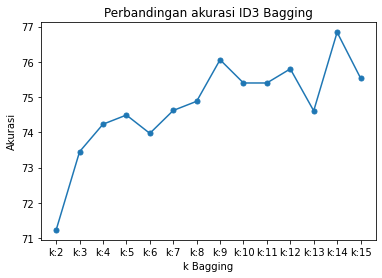

In [66]:
import matplotlib.pyplot as plt

k = [('k:'+str(i)) for i in range(2,16)]

def bagging_akurasi() :
    plt.plot(k, ratAkurasi_bagging, label='Akurasi', marker='o',  markersize=5)

    plt.xlabel('k Bagging')
    plt.ylabel('Akurasi')
    plt.title('Perbandingan akurasi ID3 Bagging')

    plt.show()

bagging_akurasi()

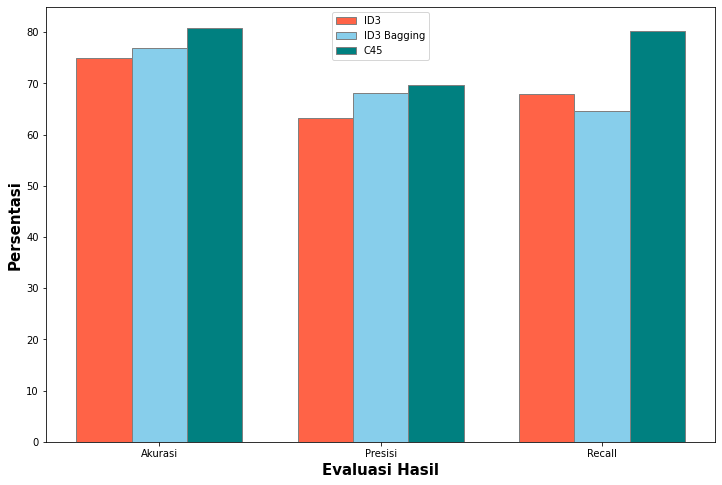

In [64]:
import numpy as np

# set width of bar
barWidth = 0.25
fig = plt.subplots(figsize =(12, 8))
 
# set height of bar
label = ['ID3', 'ID3 Bagging', 'C45']
# Akurasi = [PerbandinganMetode[label[i]][0] for i in range(len(label))]
ID3_Single = PerbandinganMetode['ID3']
ID3_Bagging = PerbandinganMetode['ID3 Bagging']
C45_Single = PerbandinganMetode['C45']
 
# Set position of bar on X axis
br1 = np.arange(len(ID3_Single))
br2 = [x + barWidth for x in br1]
br3 = [x + barWidth for x in br2]
 
# Make the plot
plt.bar(br1, ID3_Single, color ='tomato', width = barWidth,edgecolor ='grey', label ='ID3')
plt.bar(br2, ID3_Bagging, color ='skyblue', width = barWidth,edgecolor ='grey', label ='ID3 Bagging')
plt.bar(br3, C45_Single, color ='teal', width = barWidth,edgecolor ='grey', label ='C45')
 
# Adding Xticks
plt.xlabel('Evaluasi Hasil', fontweight ='bold', fontsize = 15)
plt.ylabel('Persentasi', fontweight ='bold', fontsize = 15)
plt.xticks([r + barWidth for r in range(len(ID3_Single))],['Akurasi', 'Presisi', 'Recall'])

plt.legend()
plt.show()